In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
import pickle

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [16]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [17]:
flower_images_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [18]:
X, y = [], []

for flower_name, images  in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
# for convinience lets convert X, y into numpy arrays
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
model.fit(X_train_scaled,y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 76s 877ms/step - loss: 1.3224 - accuracy: 0.4364
Epoch 2/10
86/86 [==============================] - 73s 849ms/step - loss: 1.0483 - accuracy: 0.5694
Epoch 3/10
86/86 [==============================] - 73s 847ms/step - loss: 0.9010 - accuracy: 0.6526
Epoch 4/10
86/86 [==============================] - 73s 847ms/step - loss: 0.7717 - accuracy: 0.7108
Epoch 5/10
86/86 [==============================] - 79s 923ms/step - loss: 0.6031 - accuracy: 0.7798
Epoch 6/10
86/86 [==============================] - 74s 863ms/step - loss: 0.4239 - accuracy: 0.8532
Epoch 7/10
86/86 [==============================] - 74s 857ms/step - loss: 0.2927 - accuracy: 0.8990
Epoch 8/10
86/86 [==============================] - 74s 866ms/step - loss: 0.1581 - accuracy: 0.9473
Epoch 9/10
86/86 [==============================] - 73s 847ms/step - loss: 0.0939 - accuracy: 0.9731
Epoch 10/10
86/86 [==============================] - 73s 851ms/step - loss: 0.0660 - accura

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 246ms/step - loss: 2.0097 - accuracy: 0.6187


[2.0096540451049805, 0.6187363862991333]

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

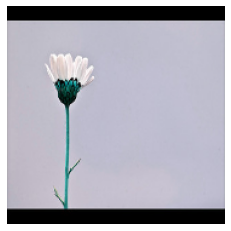

In [28]:
plt.axis('off')
plt.imshow(X[0])

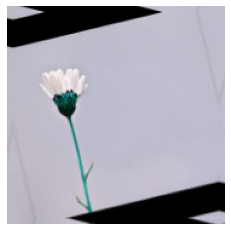

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 99s 1s/step - loss: 1.2591 - accuracy: 0.4528
Epoch 2/10
86/86 [==============================] - 99s 1s/step - loss: 1.0104 - accuracy: 0.6079
Epoch 3/10
86/86 [==============================] - 98s 1s/step - loss: 0.9117 - accuracy: 0.6443
Epoch 4/10
86/86 [==============================] - 99s 1s/step - loss: 0.8636 - accuracy: 0.6646
Epoch 5/10
86/86 [==============================] - 101s 1s/step - loss: 0.8126 - accuracy: 0.6817
Epoch 6/10
86/86 [==============================] - 102s 1s/step - loss: 0.7633 - accuracy: 0.7046
Epoch 7/10
86/86 [==============================] - 102s 1s/step - loss: 0.7389 - accuracy: 0.7126
Epoch 8/10
86/86 [==============================] - 101s 1s/step - loss: 0.7115 - accuracy: 0.7253
Epoch 9/10
86/86 [==============================] - 105s 1s/step - loss: 0.6871 - accuracy: 0.7311
Epoch 10/10
86/86 [==============================] - 105s 1s/step - loss: 0.6337 - accuracy: 0.7656


In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 287ms/step - loss: 0.7110 - accuracy: 0.7418


[0.7110324501991272, 0.741830050945282]